In [1]:
# Create a dictionary that contains ZINC ids and IC50s against Mprotease
MProteaseIC50s = {
  'CID_3194':0.67, 
  'ZINC000000008687':21, 
  'ZINC000001529266':9,
  'ZINC000001542916':1.8,
  'ZINC000001714738':125,
  'ZINC000002015152':16,
  'ZINC000013985228':1.5}

In [2]:
# Create a dictionary that contains ZINC ids and affinities against HIV protease
F = open('../../../hivpr-docking/virtual_screen/analysis/HIVpr_activities.csv','r')
lines = F.read().split('\n')[1:]
F.close()
HIVProteaseActivities = {}
for line in lines:
  cols = line.split(',')
  if len(cols)>2:
    HIVProteaseActivities[cols[0]] = float(cols[3])

In [3]:
# Create a dictionary that contains Vina scores for the library
def getVinaScore(pdbqt_FN):
  F = open(pdbqt_FN,'r')
  line = F.readline()
  while not line.startswith('REMARK VINA RESULT:'):
    line = F.readline()
  F.close()
  score = float(line.split()[3])
  return score
  
import os
import glob
pdbqt_FNs = glob.glob('../docked/*.pdbqt')
# All the docked files start with receptor_dbfda, which has 14 characters
VinaScores = {}
for FN in pdbqt_FNs:
  cid = os.path.basename(FN)[len('receptor_'):-6]
  VinaScores[cid] = getVinaScore(FN)

In [4]:
HIVProteaseDrugs = list(set(VinaScores.keys()).intersection(set(HIVProteaseActivities.keys())))
MProteaseInhibitors = list(set(MProteaseIC50s.keys()))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

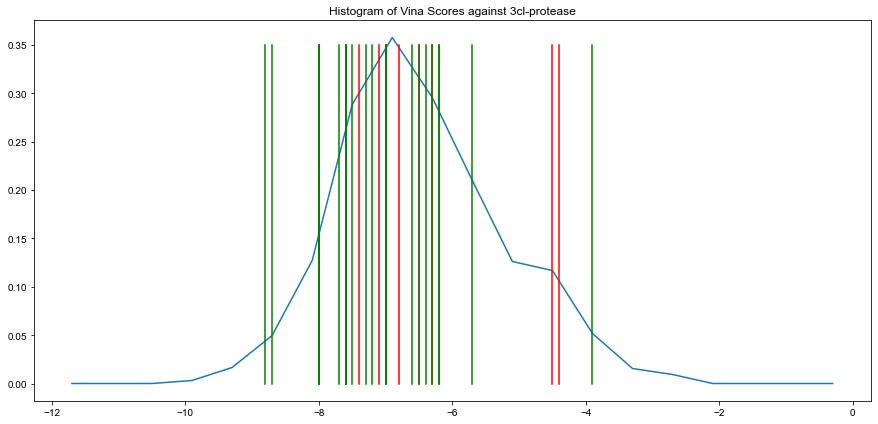

In [6]:
(density, edges) = np.histogram(list(VinaScores.values()), density=True, range=(-12,0), bins=20)
ax = plt.figure(figsize=(15,7))
plt.plot(edges[:-1]+(edges[1]-edges[0])/2,density)

top = 0.35
for cid in MProteaseInhibitors:
  plt.plot([VinaScores[cid], VinaScores[cid]],[0, top],'-r')
  
for cid in HIVProteaseDrugs:
  plt.plot([VinaScores[cid], VinaScores[cid]],[0, top],'-g')

  plt.title('Histogram of Vina Scores against 3cl-protease')
# plt.legend(['All drugs','MProtease inhibitors','HIVpr drugs'])

In [7]:
# print('We have virtually screened %d FDA-approved HIV protease inhibitors against HIV protease'%len(HIVProteaseDrugs))


named = {
  3951740:'liponavir',
  3944422:'ritonavir',
  22448696:'indinavir',
  3833846:'nelfinavir',
  3914596:'saquinavir',
  49841054:'carfilzomib',
  3955219:'darunavir',
  13831130:'raltegravir',
  3918087:'doxorubicin'}

for val in named.keys():
  key = 'ZINC'+'%012d'%val
  print('The Vina score of ',named[val],' is', VinaScores[key])

The Vina score of  liponavir  is -7.7
The Vina score of  ritonavir  is -8.0
The Vina score of  indinavir  is -7.6
The Vina score of  nelfinavir  is -8.0
The Vina score of  saquinavir  is -7.5
The Vina score of  carfilzomib  is -6.0
The Vina score of  darunavir  is -8.8
The Vina score of  raltegravir  is -8.7
The Vina score of  doxorubicin  is -8.0


In [8]:
lowestScoring = [(key, VinaScores[key]) for key in VinaScores.keys() if VinaScores[key]<-8]
print('There are %d FDA-approved drugs with a Vina score'%(len(lowestScoring)))
print('against 3cl protease of less than -9 kcal/mol,')
# print('of which %d are HIV protease drugs'%(np.sum([x[0] in HIVProteaseDrugs for x in lowestScoring])))

print('\nThey are:')
lowestScoring.sort(key=lambda x:x[1])
print('\n'.join(['%s\t%s'%(x[0],x[1]) for x in lowestScoring]))

There are 136 FDA-approved drugs with a Vina score
against 3cl protease of less than -9 kcal/mol,

They are:
ZINC000169289767	-10.2
ZINC000100013130	-9.8
ZINC000003978005	-9.7
ZINC000242548690	-9.6
ZINC000014261579	-9.6
ZINC000003977777	-9.5
ZINC000003917708	-9.4
ZINC000169621220	-9.4
ZINC000006716957	-9.3
ZINC000052955754	-9.3
ZINC000003927200	-9.3
ZINC000003985982	-9.2
ZINC000203757351	-9.2
ZINC000000538312	-9.2
ZINC000064033452	-9.2
ZINC000100378061	-9.2
ZINC000003827556	-9.1
ZINC000011679756	-9.1
ZINC000026985532	-9.1
ZINC000095616937	-9.0
ZINC000085537053	-9.0
ZINC000150338755	-9.0
ZINC000003920266	-9.0
ZINC000222731806	-9.0
ZINC000169621223	-8.9
ZINC000027428713	-8.9
ZINC000003955219	-8.8
ZINC000002036848	-8.8
ZINC000100073786	-8.8
ZINC000116473771	-8.8
ZINC000003831151	-8.8
ZINC000026664090	-8.8
ZINC000001530788	-8.8
ZINC000036701290	-8.8
ZINC000003938684	-8.8
ZINC000100370145	-8.8
ZINC000003932831	-8.8
ZINC000100003902	-8.8
ZINC000012503187	-8.8
ZINC000003939013	-8.8
ZINC000003

Text(0, 0.5, '-RT log(IC50) (kcal/mol)')

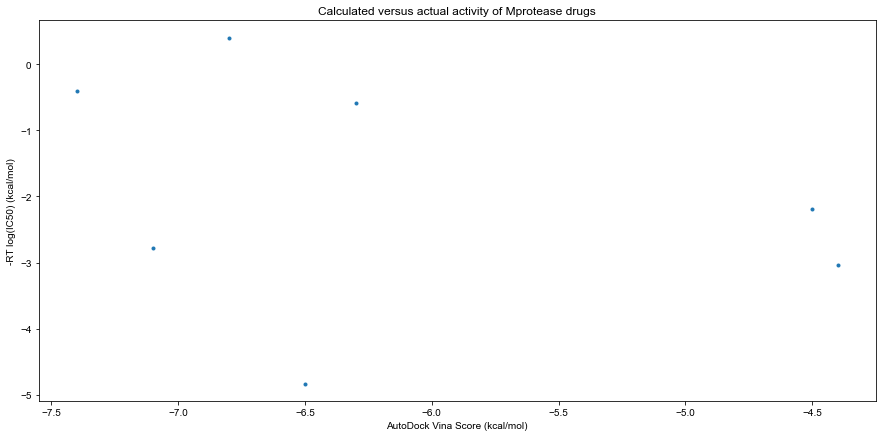

In [9]:
plt.figure(figsize=(15,7))
plt.plot([VinaScores[zn] for zn in MProteaseInhibitors],[-np.log(MProteaseIC50s[zn]) for zn in MProteaseInhibitors],'.')
plt.title('Calculated versus actual activity of Mprotease drugs')
plt.xlabel('AutoDock Vina Score (kcal/mol)')
plt.ylabel('-RT log(IC50) (kcal/mol)')

In [10]:
vals = []
for cid in MProteaseInhibitors:
  vals.append((cid, VinaScores[cid], -np.log(MProteaseIC50s[cid])))
vals.sort(key=lambda x: x[1])
for val in vals:
  print(val[0], val[1], val[2])

ZINC000013985228 -7.4 -0.4054651081081644
ZINC000002015152 -7.1 -2.772588722239781
CID_3194 -6.8 0.40047756659712525
ZINC000001714738 -6.5 -4.8283137373023015
ZINC000001542916 -6.3 -0.5877866649021191
ZINC000001529266 -4.5 -2.1972245773362196
ZINC000000008687 -4.4 -3.044522437723423


In [11]:
tuples = []
for cid in HIVProteaseDrugs:
  tuples.append((cid, VinaScores[cid], -np.log(HIVProteaseActivities[cid])))
tuples.sort(key=lambda x: x[1])
for tuple_c in tuples:
  val = int(tuple_c[0][4:])
  if val in named.keys():
    print(tuple_c[0], tuple_c[1], named[val])
  else:
    print(tuple_c[0], tuple_c[1])


ZINC000003955219 -8.8 darunavir
ZINC000013831130 -8.7 raltegravir
ZINC000003833846 -8.0 nelfinavir
ZINC000003944422 -8.0 ritonavir
ZINC000003918087 -8.0 doxorubicin
ZINC000003951740 -7.7 liponavir
ZINC000022448696 -7.6 indinavir
ZINC000018516586 -7.6
ZINC000100016058 -7.6
ZINC000003914596 -7.5 saquinavir
ZINC000000004778 -7.3
ZINC000013682481 -7.2
ZINC000002015928 -7.0
ZINC000000537822 -7.0
ZINC000003794794 -7.0
ZINC000000089763 -6.6
ZINC000003941496 -6.5
ZINC000002020233 -6.4
ZINC000003779042 -6.3
ZINC000013597823 -6.2
ZINC000000012346 -6.2
ZINC000000137884 -5.7
ZINC000008101109 -3.9
